                                       CREDIT CARD - FRAUD DETECTION PROJECT     

Goal
 The goal of my model is detection of credit card fradulent activities using MachineLearning algorithms.
 Dataset: credidcard

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

In [5]:
# importing creditcard dataset
df = pd.read_csv("creditcard.csv")

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.describe().round(decimals=2)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [11]:
#description of data in dataframe
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [63]:
df['Time_Hr'] = df['Time']/3600
print(df['Time_Hr'])

0          0.000000
1          0.000000
2          0.000278
3          0.000278
4          0.000556
            ...    
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, Length: 284807, dtype: float64


In [13]:
print("Column names : " , list(df))
print("Total Columns : " , len(list(df)))

Column names :  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Total Columns :  31


In [15]:
n_NotFraud = len(df[df["Class"] ==0])
n_Fraud = len(df[df["Class"] ==1])


No. of Not Fraud Transactions: 284315
No. of Fraud Transactions: 492


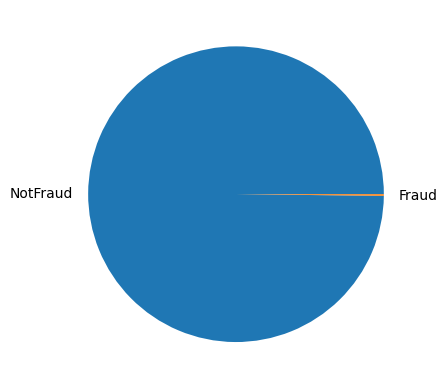

In [17]:
# class distribution
print("No. of Not Fraud Transactions:", n_NotFraud)
print("No. of Fraud Transactions:", n_Fraud)

plt.pie([n_NotFraud, n_Fraud] , labels=['NotFraud' , 'Fraud'], radius =1)
plt.show()

In [19]:
# Data Preprocessing
# Separating features and target

X, y = df.iloc[:,:-1], df.iloc[:,-1]
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [21]:
y.head()


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [23]:
#building model

k = 10
k_best = SelectKBest(f_classif, k=k)
k_best.fit(X,y)

SelectKBest()

In [25]:
mask = k_best.get_support()
not_mask = np.logical_not(mask)
all_features = np.array(list(X))

best_features = all_features[mask]
bad_features = all_features[not_mask]

print('Best features :',best_features)
print('Bad features :',bad_features)


Best features : ['V3' 'V4' 'V7' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18']
Bad features : ['Time' 'V1' 'V2' 'V5' 'V6' 'V8' 'V9' 'V13' 'V15' 'V19' 'V20' 'V21' 'V22'
 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'Amount']


In [27]:
# Dropping bad Features

X = X.drop(bad_features, axis = 1)
X.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


In [29]:
def plot_Fraud_NotFraud(features, df):
    plt_index = 0
    plt.figure(figsize=(15,15))
    plt.subplots_adjust(top = 0.99, bottom = 0.01, hspace = 1.5, wspace = 0.4)

    for feature in features:
        plt_index += 1
        feature_df = pd.concat([df[features], df['Class']], axis=1)
        Fraud = feature_df[df['Class']==1]
        NotFraud = feature_df[df['Class']==0]
        if len(NotFraud > 10000):
            NotFraud = NotFraud[::100]
        plt.subplot(5, 5, plt_index)
        sns.distplot(Fraud[feature])
        sns.distplot(NotFraud[feature])
        plt.title(feature)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2460\310816755.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Fraud[feature])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2460\310816755.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NotFraud[feature])
C:\Users\Admin\AppData\Local\Temp\ipy

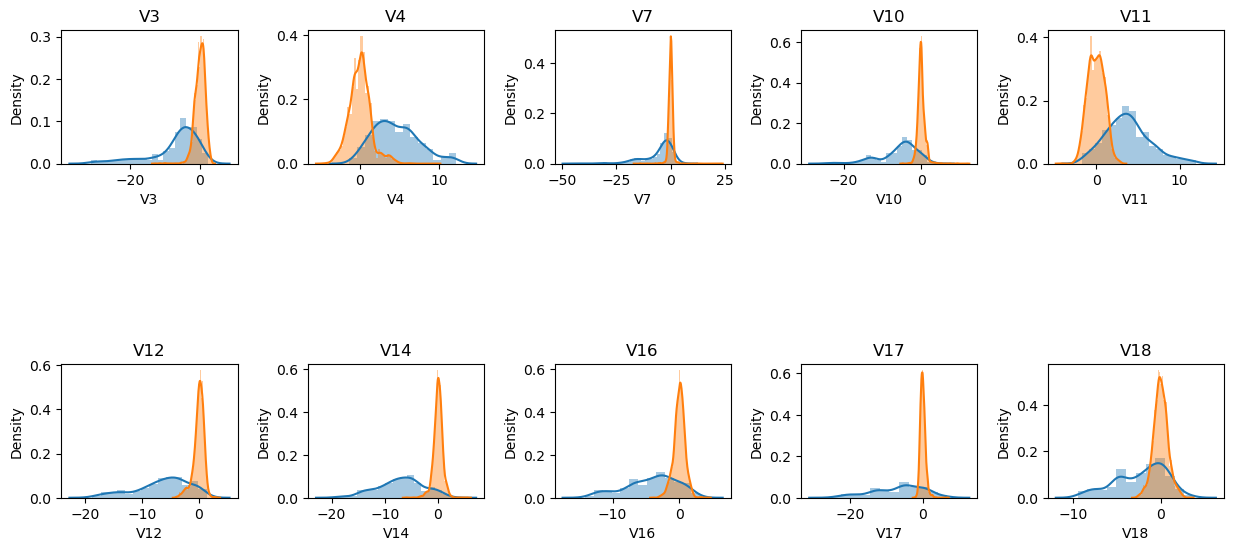

In [31]:
# Distribution plot

plot_Fraud_NotFraud(best_features, df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2460\310816755.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Fraud[feature])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2460\310816755.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NotFraud[feature])
C:\Users\Admin\AppData\Local\Temp\ipy

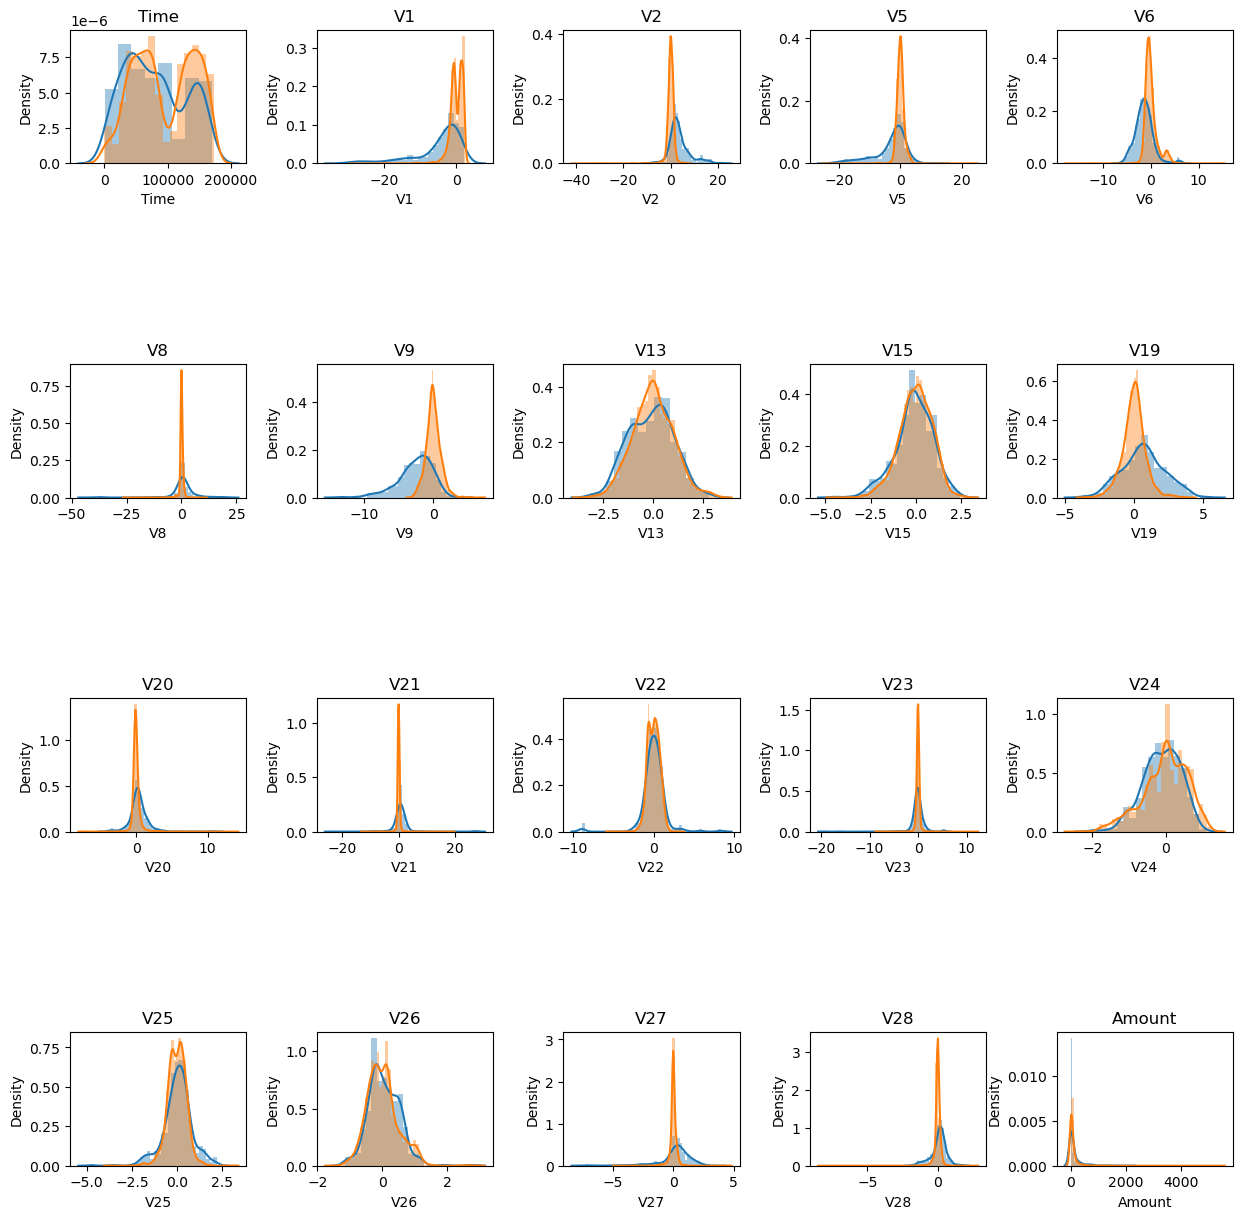

In [32]:

plot_Fraud_NotFraud(bad_features, df)

In [35]:
# train test  split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [37]:
nb = GaussianNB()
# cv_results stores the train score and estimator 
cv_results = cross_validate(nb, x_train, y_train, cv=10, scoring='recall', 
                            return_train_score = True, return_estimator = True)

In [39]:
print("Training scores from each fold : ", cv_results['train_score'])
# iteration with maximum train_score is selected for training model
max_score_index = np.argmax(cv_results['train_score'])
best_estimator = cv_results['estimator'][max_score_index]

Training scores from each fold :  [0.85013624 0.86103542 0.84741144 0.84741144 0.85286104 0.85054348
 0.84782609 0.84468665 0.84196185 0.84196185]


In [65]:
#evaluation ans visualisation
def display_results(estimator, x, y):
    predicted = estimator.predict(x)
    cm = confusion_matrix(y, predicted)
    report = classification_report(y, predicted)
    accuracy = accuracy_score(y, predicted)
    print(report)
    print("Accuracy = ", accuracy)
    plot_confusion_matrix(cm, classes=['NotFraud', 'Fraud'], title = 'Fraud detection')


In [47]:
from sklearn.metrics import classification_report

# Assuming y_true is your true labels and y_pred is your predicted labels
print(classification_report(y_train, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227437
           1       1.00      1.00      1.00       408

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



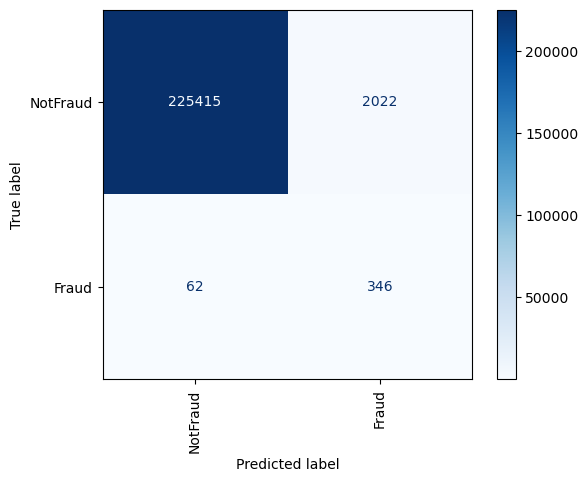

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_estimator, x_train, y_train, display_labels=['NotFraud', 'Fraud'], cmap='Blues', xticks_rotation='vertical')

In [53]:
print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       1.00      1.00      1.00        84

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



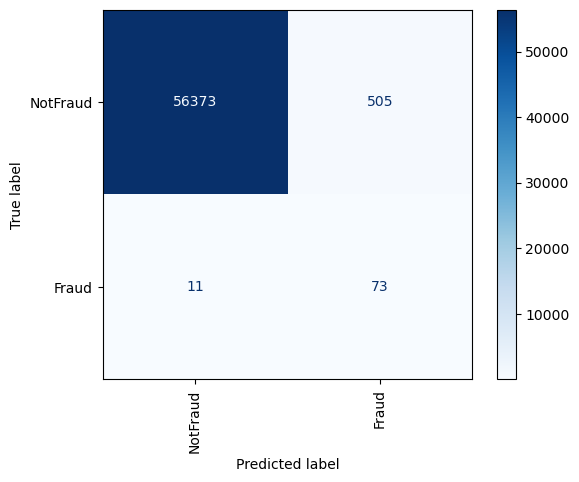

In [55]:

ConfusionMatrixDisplay.from_estimator(best_estimator, x_test, y_test, display_labels=['NotFraud', 'Fraud'], cmap='Blues', xticks_rotation='vertical')

In [161]:
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [57]:
# Define the model
model = GaussianNB()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard Deviation: {:.4f}".format(cv_scores.std()))


Cross-Validation Accuracy Scores: [0.98593799 0.99357466 0.99108162 0.99016871 0.99187163]
Mean Accuracy: 0.9905
Standard Deviation: 0.0026


Why sensitivity and precision is important?
Precision is a way for us to measure how many predictions did our model correctly predict out of all the predictions made.
Sensitivity talks about the number of positive records correctly predicted.
Both precision and sensitivity provide better model performance. 

What is the class distribution of fraud vs. non-fraud transactions in your dataset?
The class distributon in the dataset
 n_NotFraud - Number of Not Fraud Transactions
 n_Fraud - Number of Fraud Transactions


Does the 'Time' feature help in predicting fraud? How?
yes. the 'time' feature helps to find  the patterns during time of transactions,also to find the number of transactions are fraud and number of transaction are not fraud.By identifying the pattern, it is easy to develop model and helps to improve accuracy of the model.

Why should the 'Amount' feature be standardized?
Generally, when features of the input data set have large differences between their ranges, or simply when they are measured in different units.
this feature provides better model performance. It enhances data analysis and modeling accuracy. The 'amount' feature contains large set of data values from small transaction to large transaction. This scale difference may effect the efficiency.This Standardization used to fit value in the range.

Which features are dropped during preprocessing and why?
'bad_feature'['Time' 'V1' 'V2' 'V5' 'V6' 'V8' 'V9' 'V13' 'V15' 'V19' 'V20' 'V21' 'V22'
 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'Amount'] is dropped. By identifing the bad_feature and best_feature gives the predicton accuracy and improves model performance. By understanding the realtionship between these feature may help to get more decision about the model.


How does Gaussian Naive Bayes handle continuous features?
Gaussian Naive Bayes is particularly useful for continuous data.It belongs to the family of Naive Bayes classifiers and assumes that features follow a Gaussian distribution. This assumption simplifies the computation while still producing reliable results

What are the steps in training the Naive Bayes model?
Data preparation
calculate prior probability
calculate likelihood probability
train model
make prediction

How are sensitivity and precision calculated?
Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances.
precision_score function is used to measure the proportion of transaction ,which is identified as fraud that are actually fraudulent. 
Formula: precision = TP / (TP+FP)
Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. 
recall_score function is used to measure the proportion of actual fradulent transaction. 
formula: sensitivity = TP / (TP+FN) 

What metrics do you use to evaluate model performance.
confusion_matrix : Gives a summary of true positive , false positive, true negative and false negative 
Accuracy_score : overall correctness 
recall_score: Proportion of true positives among all actual fraudulent transactions 
precision_score: proportion of true positives among all positive prediction
f1_score: Harmonic mean of precision and recall

What are the key findings from your model's predictions?

classification report

   precision    recall  f1-score   support

           0       1.00      1.00      1.00    227437
           1       1.00      1.00      1.00       408

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00   


 precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       1.00      1.00      1.00        84

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00   


Cross-Validation Accuracy Scores: [0.98593799 0.99357466 0.99108162 0.99016871 0.99187163]
Mean Accuracy: 0.9905
Standard Deviation: 0.0026
  56962
 227845
26

How do different threshold values affect model performance?
Different threshold values affect model performance by altering the balance between true positive and false positives. A low threshold increases true positives but also false positives. while a highthreshold reduces false positives but may miss true positives.

What are the limitations of Naive Bayes for fraud detection?
simple assumption
no robust
limited handling of correlated features
suitable for low dimensional data
not suitable for sequential data
sensitive to imbalanced data

 What other algorithms could improve performance?
 Random forest 
 Support Vector Machine 
 Decision tree
 K-NN
 Logistic regression
 Neural networks

How can your model be integrated into a real-time fraud detection system?training model with large dataset
Deploying model in real time environment
predicting on likelihood of fraud
the result should produce alert or notification to detecting team to investigate


What are the ethical implications of deploying your fraud detection model?
When deploying fraud detection model , it is important to ensure that it treats everyone fairly, which means how it makes decision, and keeps user data safe.

What are the steps to implement Naive Bayes in Python?
importing necessary library
imporingt dataset
train test split
feature scaling
training navie bayes model

How can cross-validation improve your model?
Cross validation is used to provide accurate prediction on unbalanced data set. Detecting fradulent may improve overall performance of the model.